# 1.) Import the data from CCLE into a new Google Colab file

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.loc[df['sex'] == 'female', 'sex'] = 1
df.loc[df['sex'] == 'male', 'sex'] = 0

In [ ]:
df.loc[df['smoker'] == 'yes', 'smoker'] = 1
df.loc[df['smoker'] == 'no', 'smoker'] = 0

In [ ]:
df.loc[df['region'] == 'southeast', 'region'] = 0
df.loc[df['region'] == 'southwest', 'region'] = 1
df.loc[df['region'] == 'northeast', 'region'] = 2
df.loc[df['region'] == 'northwest', 'region'] = 3

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
data = np.array(df.iloc[:, :6])
target = np.array(df.iloc[:,-1])

In [ ]:
cut = int((len(data)*0.8) // 1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)
a = modCV.alpha_
a

124.36153733168733

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))


array([25323.33533885,  3758.94668517,  6722.9455745 , ...,
       11819.35726469, 11826.85714299, 12265.31712827])

# 6.) Visualize the coefficients 

In [ ]:
mod1.coef_

array([3569.23151969,    0.        , 1898.54648481,  404.69028273,
       9345.16096664,  182.54253086])

In [ ]:
x_axis = (['age', 'sex', 'bmi', 'children', 'smoker', 'region']).copy()
y_axis = mod1.coef_

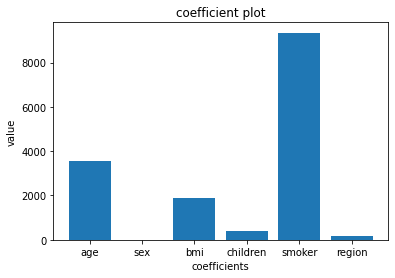

In [ ]:
plt.bar(x_axis, y_axis)
plt.title('coefficient plot')
plt.xlabel('coefficients')
plt.ylabel('value')
plt.show()

# 7.) Interpret the coefficients

The lasso regression shrinks the beta for 'sex' to 0, meaning that sex is uncorrelated with the charges and is dropped out of the model

# 8.) Compare in and out of sample MSE’s

In [ ]:
from sklearn.metrics import mean_squared_error
in_pred = mod1.predict(np.array(in_data_scale))
out_pred = mod1.predict(np.array(out_data_scale))
in_sample_mse = mean_squared_error(in_pred, in_target)
out_sample_mse = mean_squared_error(out_pred, out_target)

In [ ]:
in_sample_mse

36596100.01372155

In [ ]:
out_sample_mse

37069680.31440854